In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
au=pd.Series(pd.read_csv('/content/au.csv')['Close Price'],name='AU')
axis=pd.Series(pd.read_csv('/content/axis.csv')['Close Price'],name='Axis')
bob=pd.Series(pd.read_csv('/content/bob.csv')['Close Price'],name='BoB')
fed=pd.Series(pd.read_csv('/content/federal.csv')['Close Price'],name='FB')
hdfc=pd.Series(pd.read_csv('/content/hdfc.csv')['Close Price'],name='HDFC')
icici=pd.Series(pd.read_csv('/content/icici.csv')['Close Price'],name='ICICI')
idfc=pd.Series(pd.read_csv('/content/idfc.csv')['Close Price'],name='IDFC')
indusind=pd.Series(pd.read_csv('/content/indusind.csv')['Close Price'],name='INDUSIND')
kotak=pd.Series(pd.read_csv('/content/kotak.csv')['Close Price'],name='Kotak')
sbi=pd.Series(pd.read_csv('/content/sbin.csv')['Close Price'],name='SBI')

In [ ]:
df=pd.concat([au,axis,bob,fed,hdfc,icici,idfc,indusind,kotak,sbi],axis=1)
df.head()

,AU,Axis,BoB,FB,HDFC,ICICI,IDFC,INDUSIND,Kotak,SBI
0,740.50,1074.65,197.25,147.30,1559.00,935.20,85.27,1466.35,1755.50,564.70
1,748.90,1060.40,197.65,150.20,1559.25,939.35,84.92,1483.95,1752.70,568.50
2,737.05,1020.40,196.50,149.85,1529.60,926.05,85.22,1477.80,1741.05,564.55
3,722.10,1008.15,193.15,147.45,1532.05,929.15,84.31,1475.65,1743.00,560.30
4,719.65,999.05,194.30,147.10,1521.75,923.05,84.16,1486.80,1738.40,559.95


In [ ]:
## ['Axis', 'BoB', ], ['FB', 'ICICI', ], ['IDFC', 'INDUSIND', ]

## combining (Axis and BoB) (FB and ICICI) and (IDFC and INDUSIND)

axis=df['Axis']
bob=df['BoB']
fb=df['FB']
icici=df['ICICI']
idfc=df['IDFC']
indusind=df['INDUSIND']


au=pd.Series(df['AU'],name='au')
kotak=pd.Series(df['Kotak'],name='kotak')
hdfc=pd.Series(df['HDFC'],name='hdfc')
sbi=pd.Series(df['SBI'],name='sbi')



axis_bob=pd.Series([max(axis[i],bob[i]) for i in range(len(axis))],name='axis_bob')
fb_icici=pd.Series([max(fb[i],icici[i]) for i in range(len(fb))],name='fb_icici')
idfc_indusind=pd.Series([max(idfc[i],indusind[i]) for i in range(len(idfc))],name='idfc_indusind')



In [ ]:
date_range = pd.date_range(end='2023-11-30', start='2022-01-03', freq='D')[::-1]
date_df = pd.Series(date_range,name='date')

df_combined=pd.concat([date_df,axis_bob,fb_icici,idfc_indusind,au,kotak,hdfc,sbi],axis=1)
df_combined.head()
org_data=df_combined

In [ ]:
# ## Plotting the time series data

# plt.figure(figsize=(10,4))

# plt.subplot(3,1,1)
# plt.plot(df_combined['date'],df_combined.iloc[:,1],)
# plt.title('Closing stock values of Axis_BoB')
# plt.xlabel('date')
# plt.xticks(rotation=45)
# plt.ylabel('Value')
# plt.legend()
# plt.show()


# plt.subplot(3,1,2)
# plt.plot(df_combined['date'],df_combined.iloc[:,2],)
# plt.title('Closing stock values of fb_icici')
# plt.xlabel('date')
# plt.xticks(rotation=45)
# plt.ylabel('Value')
# plt.legend()
# plt.show()



# plt.subplot(3,1,3)
# plt.plot(df_combined['date'],df_combined.iloc[:,3],)
# plt.title('Closing stock values of idfc_indusind')
# plt.xlabel('date')
# plt.ylabel('Value')
# plt.xticks(rotation=45)
# plt.legend()
# plt.show()




# plt.subplot(3,2,1)
# plt.plot(df_combined['date'],df_combined.iloc[:,4],)
# plt.title('Closing stock values of au')
# plt.xlabel('date')
# plt.ylabel('Value')
# plt.xticks(rotation=45)
# plt.legend()
# plt.show()


# plt.subplot(3,2,2)
# plt.plot(df_combined['date'],df_combined.iloc[:,5],)
# plt.title('Closing stock values of kotak')
# plt.xlabel('date')
# plt.ylabel('Value')
# plt.xticks(rotation=45)
# plt.legend()
# plt.show()


# plt.subplot(3,2,3)
# plt.plot(df_combined['date'],df_combined.iloc[:,6],)
# plt.title('Closing stock values of hdfc')
# plt.xlabel('date')
# plt.ylabel('Value')
# plt.xticks(rotation=45)
# plt.legend()
# plt.show()




# plt.subplot(3,3,1)
# plt.plot(df_combined['date'],df_combined.iloc[:,7],)
# plt.title('Closing stock values of sbi')
# plt.xlabel('date')
# plt.ylabel('Value')
# plt.xticks(rotation=45)
# plt.legend()
# plt.show()

In [ ]:
## predictions for dec 2023

au_dec_closing=pd.Series(pd.read_csv('/content/axis_dec_closing.csv')['Close Price'],name='au_dec_closing')
axis_dec_closing=pd.Series(pd.read_csv('/content/axis_dec_closing.csv')['Close Price'],name='axis_dec_closing')
bob_dec_closing=pd.Series(pd.read_csv('/content/bob_dec_closing.csv')['Close Price'],name='bob_dec_closing')
fb_dec_closing=pd.Series(pd.read_csv('/content/fb_dec_closing.csv')['Close Price'],name='fb_dec_closing')
hdfc_dec_closing=pd.Series(pd.read_csv('/content/hdfc_dec_closing.csv')['Close Price'],name='hdfc_dec_closing')
icici_dec_closing=pd.Series(pd.read_csv('/content/icici_dec_closing.csv')['Close Price'],name='icici_dec_closing')
idfc_dec_closing=pd.Series(pd.read_csv('/content/idfc_dec_closing.csv')['Close Price'],name='idfc_dec_closing')
indusind_dec_closing=pd.Series(pd.read_csv('/content/indusind_dec_closing.csv')['Close Price'],name='indusind_dec_closing')
kotak_dec_closing=pd.Series(pd.read_csv('/content/kotak_dec_closing.csv')['Close Price'],name='kotak_dec_closing')
sbi_dec_closing=pd.Series(pd.read_csv('/content/sbi_dec_closing.csv')['Close Price'],name='sbi_dec_closing')

In [ ]:
df_combined=df_combined.dropna()


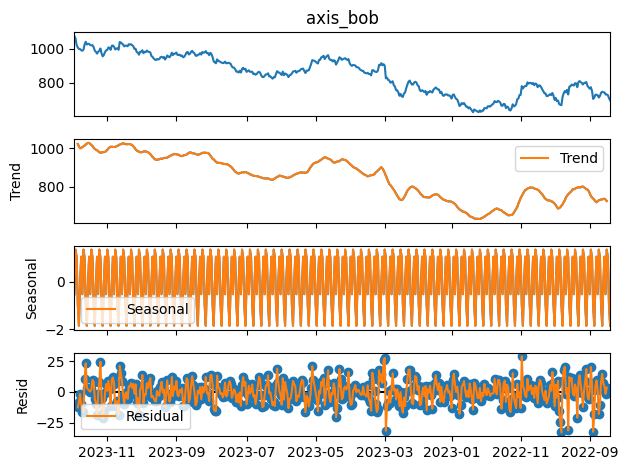

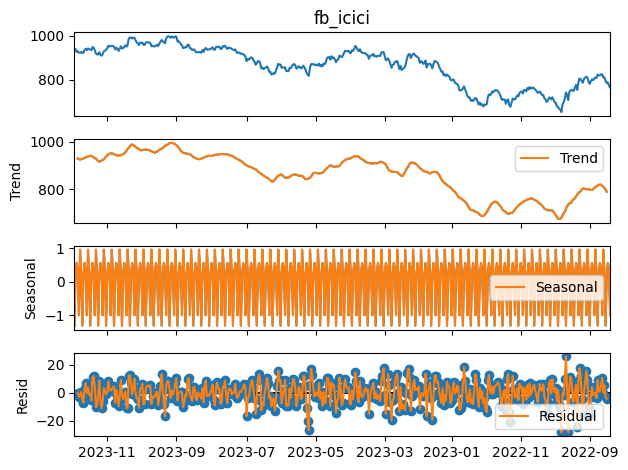

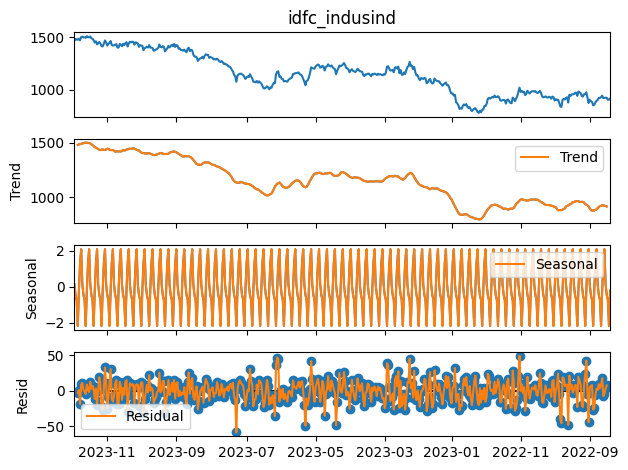

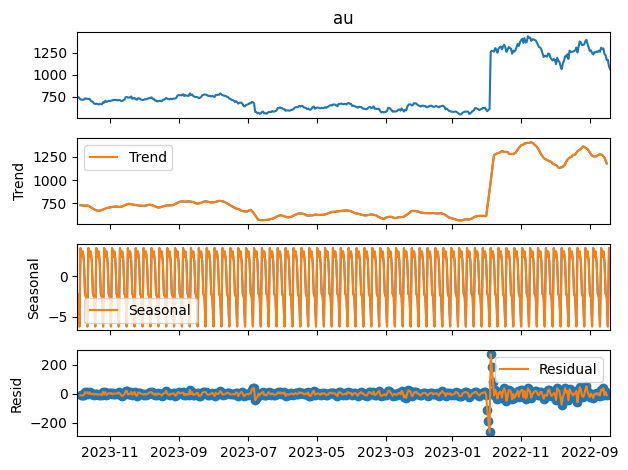

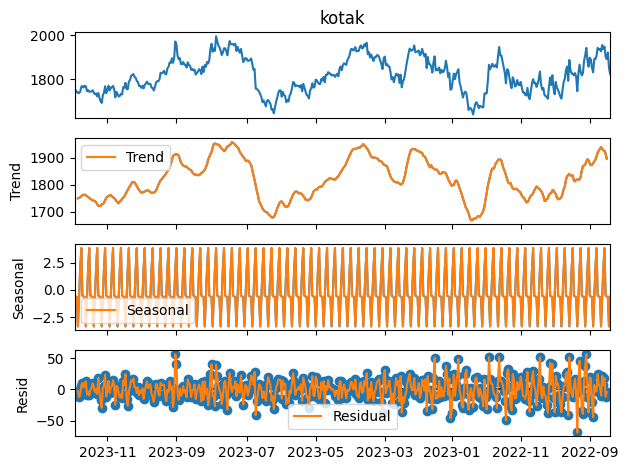

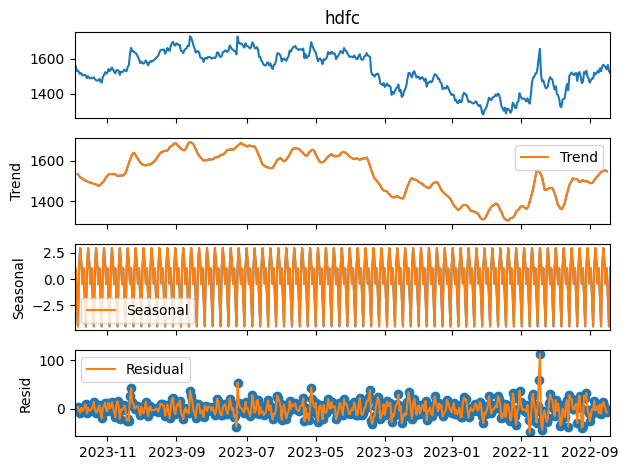

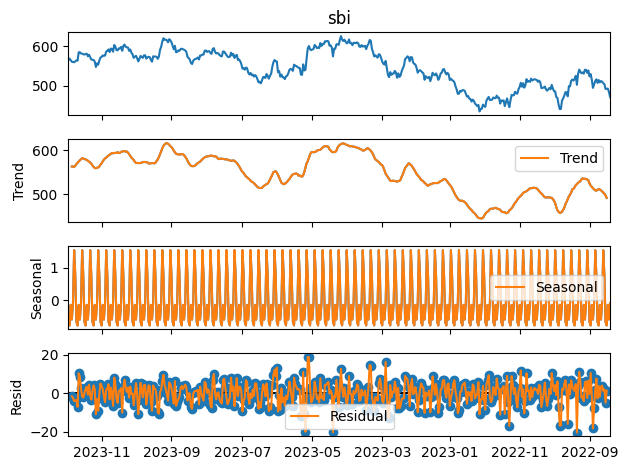

In [ ]:

df_combined.set_index(df_combined['date'],inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,1], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()



decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,2], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()



decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,3], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()



decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,4], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()



decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,5], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()


decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,6], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()


decomposition = sm.tsa.seasonal_decompose(df_combined.iloc[:,7], model='additive')
fig = decomposition.plot()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.show()

In [ ]:
print(df_combined['au'][:100].mean())
print(df_combined['au'][100:230].mean())
print(df_combined['au'][230:360].mean())
print(df_combined['au'][360:474].mean())

722.5460000000002
666.093076923077
621.8992307692308
1236.0289473684209


In [ ]:
# df_combined=df_combined.diff().dropna()

In [ ]:
print(df_combined['au'][:100].mean())
print(df_combined['au'][100:230].mean())
print(df_combined['au'][230:360].mean())
print(df_combined['au'][360:474].mean())

722.5460000000002
666.093076923077
621.8992307692308
1236.0289473684209


In [ ]:
# from statsmodels.graphics.tsaplots import plot_pacf
# plot_pacf(df_combined['fb_icici'],use_vlines=True,lags=20)


In [ ]:
# pacf_values = sm.tsa.stattools.pacf(df_combined['au'], nlags=20)
# pacf_values


for c in df_combined.columns[1:]:
  pacf_values = sm.tsa.stattools.pacf(df_combined[c], nlags=20)
  print(c,pacf_values)

axis_bob [ 1.          0.98998205  0.02140519  0.04443909  0.04082815 -0.0022994
 -0.02695764  0.02765602  0.01029652 -0.03777497 -0.0400664  -0.06863557
  0.05125587  0.00346918  0.00703771 -0.00557006 -0.03504349  0.10926604
  0.03473844  0.05476188  0.06153231]
fb_icici [ 1.          0.9935559  -0.03666502  0.07977586 -0.02465982  0.01216076
 -0.00150879 -0.00445011  0.03530274 -0.00358096  0.03046052  0.01516942
 -0.06073955 -0.05893445  0.06214353 -0.10208835 -0.02759833  0.02764123
 -0.02243301 -0.02445655  0.01874079]
idfc_indusind [ 1.          0.99221467  0.0049553   0.01134945  0.00179664 -0.03527641
 -0.01697606  0.01763638  0.09448075 -0.04113542  0.0111489  -0.05765764
  0.01575735  0.01845837 -0.0241873  -0.03705919 -0.06964832  0.05649517
  0.00733592 -0.03502583 -0.0522771 ]
au [ 1.00000000e+00  9.92169631e-01 -2.84182587e-02 -7.93888089e-02
  4.26881713e-02 -8.07315367e-02 -5.21775030e-03  7.53458611e-03
 -5.73524511e-02 -4.08754034e-02  8.83444367e-04  5.21782152e-02


In [ ]:

for c in df_combined.columns[1:]:
  acf_values = sm.tsa.stattools.acf(df_combined[c], nlags=20)
  print(c,acf_values)

axis_bob [1.         0.98789348 0.97635408 0.96581589 0.95615284 0.94645927
 0.93626447 0.9267209  0.91750113 0.90761856 0.8970323  0.88531628
 0.87495608 0.86488625 0.85500002 0.84500096 0.83443161 0.82619928
 0.81857    0.81171315 0.80575847]
fb_icici [1.         0.99145979 0.98251909 0.97465438 0.96661276 0.95868463
 0.95085028 0.94299815 0.93564612 0.92834932 0.92140805 0.91475411
 0.907346   0.89918065 0.89191873 0.88360211 0.87477584 0.86653222
 0.85813197 0.84945958 0.84117029]
idfc_indusind [1.         0.99012139 0.98041252 0.97096902 0.961638   0.95184878
 0.94190009 0.93233447 0.9243036  0.91567542 0.90725143 0.89806447
 0.88930937 0.88092194 0.87217471 0.86279847 0.8526166  0.84339201
 0.83451695 0.82500304 0.8147746 ]
au [1.         0.99007645 0.97980555 0.96839465 0.95769847 0.94581828
 0.93401931 0.92224912 0.90985045 0.89684343 0.8838448  0.87176739
 0.85899553 0.84634597 0.8342054  0.8223535  0.8097214  0.79625586
 0.78239124 0.76866628 0.75579657]
kotak [1.         0.9

In [ ]:
# plot_acf(df_combined['axis_bob'])

In [ ]:
df_combined=df_combined.diff().dropna()

In [ ]:
# df_combined.drop(['date'],axis=1)
!pip install pmdarima


In [ ]:
# import pandas as pd
# import numpy as np
# from pmdarima import auto_arima

# # Assuming your differenced data is in a DataFrame named 'differenced_df'

# # Dictionary to store the best ARIMA models for each column
# best_models = {}

# # Iterate through each column
# for column in df_combined.columns:
#     # Use auto ARIMA to find the best model for the differenced data of the current column
#     auto_model = auto_arima(df_combined[column], seasonal=False, trace=True)
#     best_models[column] = auto_model

#     # # Print the summary of the best model for the current column
#     # print(f"Best ARIMA model for differenced column '{column}':")
#     # print(auto_model.summary())
#     # print()

# # Now you have the best ARIMA models for each differenced column stored in the 'best_models' dictionary
# # You can access each model using its corresponding column name


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from itertools import product

# Assuming your stationary data is in a DataFrame named 'stationary_df'

# Dictionary to store the best ARMA models for each column
best_arma_models = {}

# Function to evaluate ARMA models for a given column
def evaluate_arma_models(data):
    best_aic = np.inf
    best_arma_model = None

    # Define the range of p and q values
    p_values = range(0, 3)  # Adjust the range as needed
    q_values = range(0, 3)  # Adjust the range as needed

    # Iterate through all possible combinations of p and q
    for p, q in product(p_values, q_values):
        # Skip the combination if both p and q are 0
        if p == 0 and q == 0:
            continue

        try:
            # Fit the ARMA model
            arma_model = ARIMA(data, order=(p, 0, q))
            results = arma_model.fit()

            # Keep track of the model with the lowest AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_arma_model = results

        except:
            continue

    return best_arma_model

for column in df_combined.columns:
    # Find the best ARMA model for the current column
    best_arma_model = evaluate_arma_models(df_combined[column])
    best_arma_models[column] = best_arma_model

#     # Print the summary of the best model for the current column
#     print(f"Best ARMA model for column '{column}':")
#     print(best_arma_model)
#     print()

# Now you have the best ARMA models for each column stored in the 'best_arma_models' dictionary
# You can access each model using its corresponding column name


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

In [ ]:
best_arma_models.keys()

dict_keys(['date', 'axis_bob', 'fb_icici', 'idfc_indusind', 'au', 'kotak', 'hdfc', 'sbi'])

In [ ]:
## axis_bob

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


# Dates for prediction
prediction_dates = pd.to_datetime([
    '2023-12-29', '2023-12-28', '2023-12-27', '2023-12-26', '2023-12-22',
    '2023-12-21', '2023-12-20', '2023-12-19', '2023-12-18', '2023-12-15',
    '2023-12-14', '2023-12-13', '2023-12-12', '2023-12-11', '2023-12-08',
    '2023-12-07', '2023-12-06', '2023-12-05', '2023-12-04', '2023-12-01'
])
prediction_dates.sort_values()

# Forecast the values
forecast = best_arma_models['axis_bob'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates
forecast_df = pd.DataFrame({'Date': prediction_dates, 'Forecast': forecast})
axis_dec_closing_diff=axis_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(axis_dec_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))

axispred=predicted
# print(axispred)

9.381578947368421


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
## fb_icici

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Forecast the values
forecast = best_arma_models['fb_icici'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates
forecast_df = pd.DataFrame({'Date': prediction_dates, 'Forecast': forecast})
fb_dec_closing_diff=fb_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(fb_dec_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))

fbpred=predicted

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1.3263157894736821


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
## au,kotak,hdfc,sbi


## au

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Forecast the values
forecast = best_arma_models['au'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates
forecast_df = pd.DataFrame({'Date': prediction_dates, 'Forecast': forecast})
au_dec_closing_diff=au_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(au_dec_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))

aupred=predicted




9.381578947368421


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:

## kotak

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Forecast the values
forecast = best_arma_models['kotak'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates
forecast_df = pd.DataFrame({'Date': prediction_dates, 'Forecast': forecast})
kotak_dec_closing_diff=kotak_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(kotak_dec_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))

kotakpred=predicted

15.500000000000012


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
## hdfc




import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Forecast the values
forecast = best_arma_models['hdfc'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates
forecast_df = pd.DataFrame({'Date': prediction_dates, 'Forecast': forecast})
hdfc_dec_closing_diff=hdfc_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(hdfc_dec_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))

hdfcpred=predicted

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


12.371052631578957


In [ ]:

## sbi

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Forecast the values
forecast = best_arma_models['sbi'].forecast(steps=len(prediction_dates))

# Create a DataFrame with the forecasted values and dates
forecast_df = pd.DataFrame({'Date': prediction_dates, 'Forecast': forecast})
sbi_dec_closing_diff=sbi_dec_closing.diff().dropna()
predicted=np.array(forecast_df['Forecast'])
actual=np.array(sbi_dec_closing_diff)
print(np.mean(np.abs(actual,predicted[:19])))

sbipred=predicted

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


7.705263157894736


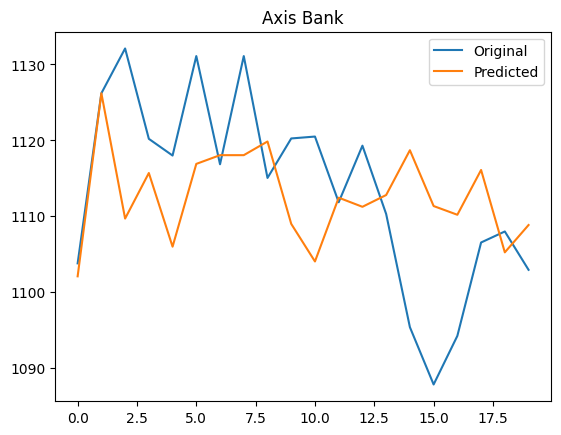

In [ ]:
## plotting the actual vs predicted data


## axis bank

original=np.array(axis_dec_closing)
predicted=np.array(axispred)
actual_pred=[]
#print(axis_original)

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+axispred[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
plt.title('Axis Bank')
axis_actual_pred=actual_pred

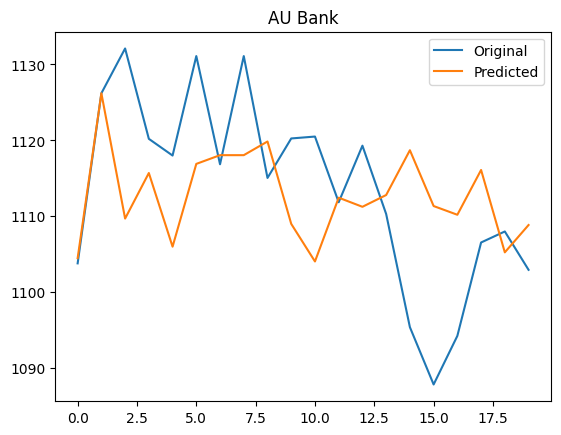

In [ ]:
## plotting the actual vs predicted data


## au bank

original=np.array(au_dec_closing)
predicted=np.array(aupred)
actual_pred=[]
#print(axis_original)

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+predicted[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
plt.title('AU Bank')
au_actual_pred=actual_pred


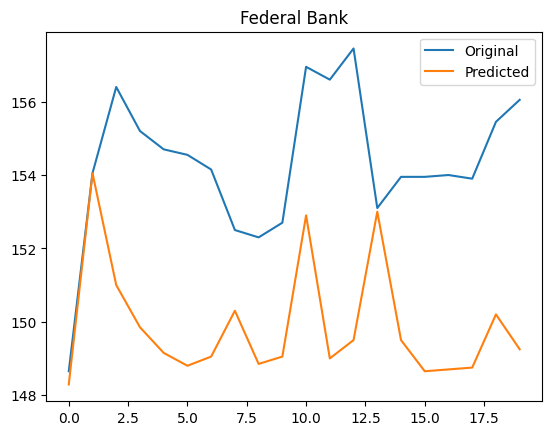

In [ ]:
## plotting the actual vs predicted data


## fb bank

original=np.array(fb_dec_closing)
predicted=np.array(fbpred)
actual_pred=[]
#print(axis_original)

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+predicted[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
plt.title('Federal Bank')
fb_actual_pred=actual_pred

[1750.8, 1817.3, 1828.1, 1820.25, 1826.25, 1837.35, 1843.95, 1824.5, 1825.9, 1853.4, 1850.05, 1846.75, 1847.5, 1824.65, 1853.2, 1861.3, 1886.35, 1902.6, 1919.9, 1908.1]
[1750.8726570175081, 1817.3, 1761.6, 1758.6499999999999, 1756.8, 1761.8999999999999, 1757.4, 1770.25, 1752.2, 1778.3, 1754.15, 1754.1, 1751.55, 1773.6499999999999, 1779.35, 1758.8999999999999, 1775.85, 1767.05, 1768.1000000000001, 1762.6000000000001]


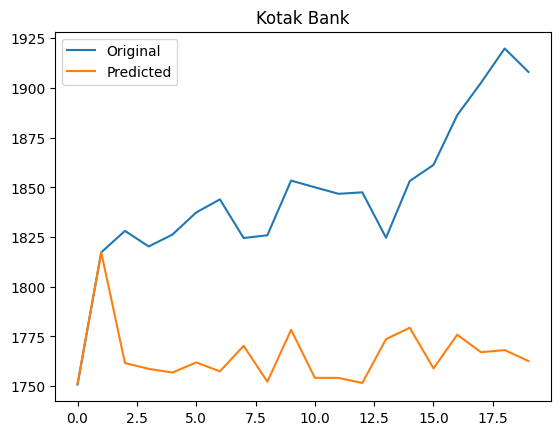

In [ ]:
## plotting the actual vs predicted data


## kotak bank

original=np.array(kotak_dec_closing)
predicted=np.array(kotakpred)
actual_pred=[]
#print(axis_original)

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+predicted[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
plt.title('Kotak Bank')

print(original)
print(actual_pred)
kotak_actual_pred=actual_pred

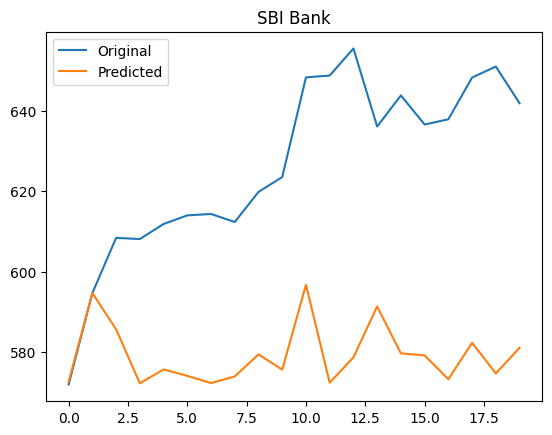

In [ ]:
## plotting the actual vs predicted data


## sbi bank

original=np.array(sbi_dec_closing)
predicted=np.array(sbipred)
actual_pred=[]
#print(axis_original)

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+predicted[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
plt.title('SBI Bank')
sbi_actual_pred=actual_pred

[1555.5, 1609.05, 1623.45, 1627.2, 1630.6, 1653.1, 1650.75, 1634.5, 1631.6, 1649.95, 1656.3, 1656.0, 1653.05, 1656.2, 1686.4, 1670.7, 1683.1, 1702.85, 1705.2, 1709.65]
[1556.7211377915428, 1609.05, 1569.9, 1559.25, 1558.8999999999999, 1578.0, 1557.85, 1571.75, 1558.4, 1573.8500000000001, 1561.85, 1555.8, 1558.45, 1558.65, 1585.7, 1571.2, 1567.8999999999999, 1575.25, 1557.8500000000001, 1559.95]


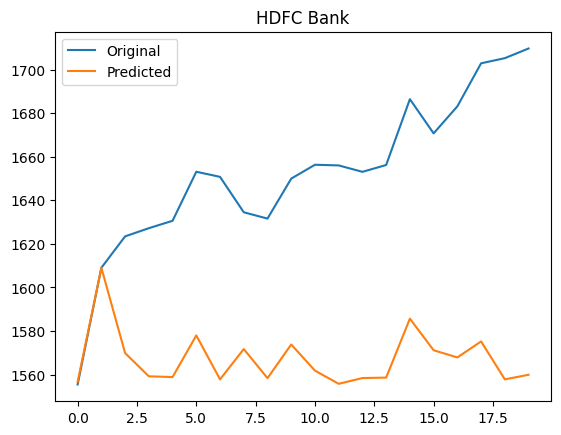

In [ ]:
## plotting the actual vs predicted data


## hdfc bank

original=np.array(hdfc_dec_closing)
predicted=np.array(hdfcpred)
actual_pred=[]
#print(axis_original)

last_obs_val=original[len(original)-1]

actual_pred.append(last_obs_val+predicted[0])
for diff in predicted[1:]:
  actual_pred.append(original[-1]+diff)
original=list(original)
actual_pred=list(actual_pred)
original.reverse()
actual_pred.reverse()

import matplotlib.pyplot as plt

plt.plot(original,label='original data')
plt.plot(actual_pred,label='predicted values')
plt.legend(['Original','Predicted'])
plt.title('HDFC Bank')
hdfc_actual_pred=actual_pred
print(original)
print(actual_pred)

In [ ]:
best_arma_models.keys()

dict_keys(['date', 'axis_bob', 'fb_icici', 'idfc_indusind', 'au', 'kotak', 'hdfc', 'sbi'])

In [ ]:
print(best_arma_models['sbi'].summary())

                               SARIMAX Results                                
Dep. Variable:                    sbi   No. Observations:                  473
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1646.581
Date:                Tue, 26 Mar 2024   AIC                           3305.163
Time:                        09:34:23   BIC                           3330.117
Sample:                             0   HQIC                          3314.978
                                - 473                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1813      0.365     -0.497      0.619      -0.897       0.534
ar.L1          0.6076      0.020     30.976      0.000       0.569       0.646
ar.L2         -0.9603      0.019    -49.798      0.0

In [ ]:
best_arma_models.keys()

dict_keys(['date', 'axis_bob', 'fb_icici', 'idfc_indusind', 'au', 'kotak', 'hdfc', 'sbi'])

In [ ]:
# ar_params=best_arma_models['axis_bob'].arparams
# ar_params

## extracting the ar and ma coeffecients for each bank

coeff_matrix={}

axis_ar=best_arma_models['axis_bob'].arparams
axis_ma=best_arma_models['axis_bob'].maparams
axis_const=-0.8031

fb_ar=best_arma_models['fb_icici'].arparams
fb_ma=best_arma_models['fb_icici'].maparams
fb_const=-0.3605


au_ar=best_arma_models['au'].arparams
au_ma=best_arma_models['au'].maparams
au_const=0.6843

kotak_ar=best_arma_models['kotak'].arparams
kotak_ma=best_arma_models['kotak'].maparams
kotak_const=0.1697

hdfc_ar=best_arma_models['hdfc'].arparams
hdfc_ma=best_arma_models['hdfc'].maparams
hdfc_const=0.0073

sbi_ar=best_arma_models['sbi'].arparams
sbi_ma=best_arma_models['sbi'].maparams
sbi_const=-0.1813


**AFTER Algorithm**


In [ ]:
best_arma_models.keys()

## for axis_bob:

## predict december values using all the models for axis. For all predictions compute variance and then apply the formula

dict_keys(['date', 'axis_bob', 'fb_icici', 'idfc_indusind', 'au', 'kotak', 'hdfc', 'sbi'])

In [ ]:
axis_var=np.var(axis_actual_pred)
fb_var=np.var(fb_actual_pred)
au_var=np.var(au_actual_pred)
kotak_var=np.var(kotak_actual_pred)
hdfc_var=np.var(hdfc_actual_pred)
sbi_var=np.var(sbi_actual_pred)

variances=[]
variances.append(axis_var)
variances.append(fb_var)
variances.append(au_var)
variances.append(kotak_var)
variances.append(hdfc_var)
variances.append(sbi_var)

In [ ]:
# ## weights for axis:
num1=1
t1=0
org1=list(axis_dec_closing)
for j in range(0,len(axis_actual_pred)):
  t1=t1+(org1[j]-axis_actual_pred[j])**2/(variances[0])
num1=variances[0]**(-0.5)*np.exp(-0.5*t1)


## weights for fb

num2=1
t2=0
org2=list(fb_dec_closing)
for j in range(0,len(fb_actual_pred)):
  t2=t2+(org2[j]-fb_actual_pred[j])**2/(variances[1])
num2=variances[1]**(-0.5)*np.exp(-0.5*t2)


## weights for au

num3=1
t3=0
org3=list(au_dec_closing)
for j in range(0,len(au_actual_pred)):
  t3=t3+(org3[j]-au_actual_pred[j])**2/(variances[2])
num3=variances[2]**(-0.5)*np.exp(-0.5*t3)



## weights for kotak
num4=1
t4=0
org4=list(kotak_dec_closing)
for j in range(0,len(kotak_actual_pred)):
  t4=t4+(org4[j]-kotak_actual_pred[j])**2/(variances[3])
num4=variances[3]**(-0.5)*np.exp(-0.5*t4)


## weights for hdfc

num5=1
t5=0
org5=list(hdfc_dec_closing)
for j in range(0,len(hdfc_actual_pred)):
  t5=t5+(org5[j]-hdfc_actual_pred[j])**2/(variances[4])
num5=variances[4]**(-0.5)*np.exp(-0.5*t5)



## weights for sbi
num6=1
t6=0
org6=list(sbi_dec_closing)
for j in range(0,len(axis_actual_pred)):
  t6=t6+(org6[j]-sbi_actual_pred[j])**2/(variances[5])
num6=variances[5]**(-0.5)*np.exp(-0.5*t6)




denominator=num1+num2+num3+num4+num5+num6
print('weights for axis: ',num1/denominator)
print('weights for fb: ',num2/denominator)
print('weights for au: ',num3/denominator)
print('weights for kotak: ',num4/denominator)
print('weights for hdfc: ',num5/denominator)
print('weights for sbi: ',num6/denominator)



weights for axis:  0.9697827037089168
weights for fb:  8.043153714306851e-24
weights for au:  0.030217296291083048
weights for kotak:  2.5425700093791115e-135
weights for hdfc:  3.657232756890787e-204
weights for sbi:  3.2216323543353165e-201


In [ ]:

axis_original=np.array(axis_dec_closing)
fb_original=np.array(fb_dec_closing)
kotak_original=np.array(kotak_dec_closing)
au_original=np.array(au_dec_closing)
hdfc_original=np.array(hdfc_dec_closing)
sbi_original=np.array(sbi_dec_closing)

In [ ]:
## Random weight generation

## 1) model for axis bank
ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<100:
  m1=np.random.rand()
  m2=np.random.rand()
  m3=np.random.rand()
  m4=np.random.rand()
  m5=np.random.rand()
  m6=np.random.rand()
  sum=np.sum([m1,m2,m3,m4,m5,m6])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6)==m1 and m1+m2+m3+m4+m5+m6<=1:
    for i in range(len(axis_actual_pred)):
      v=m1*axis_actual_pred[i]+m2*fb_actual_pred[i]+m3*kotak_actual_pred[i]+m4*au_actual_pred[i]+m5*hdfc_actual_pred[i]+m6*sbi_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    mse=np.mean((axis_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
    ct=ct+1
  else:
    ct=ct+1


print(best_weights)

[0.2915525719402707, 0.15272438313440476, 0.2387207659892186, 0.10966577673004535, 0.1520101730395643, 0.05532632916649626]


In [ ]:
best_weights[0]*axis_actual_pred[0]+best_weights[1]*fb_actual_pred[0]+best_weights[2]*kotak_actual_pred[0]+best_weights[3]*au_actual_pred[0]+best_weights[4]*hdfc_actual_pred[0]+best_weights[5]*sbi_actual_pred[0]

1151.3730364710668

In [ ]:
pred=[]
for i in range(len(axis_actual_pred)):
  v=best_weights[0]*axis_actual_pred[i]+best_weights[1]*fb_actual_pred[i]+best_weights[2]*kotak_actual_pred[i]+best_weights[3]*au_actual_pred[i]+best_weights[4]*hdfc_actual_pred[i]+best_weights[5]*sbi_actual_pred[i]
  pred.append(v)

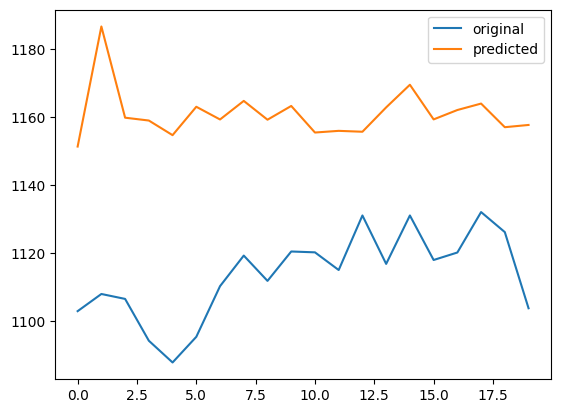

In [ ]:
## Axis bank
plt.plot(axis_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [ ]:
## Federal bank
## Random weight generation

ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<1000:
  m1=np.random.rand()*0.01
  m2=np.random.rand()
  m3=np.random.rand()*0.06
  m4=np.random.rand()*0.06
  m5=np.random.rand()*0.006
  m6=np.random.rand()*0.06
  sum=np.sum([m1,m2,m3,m4,m5,m6])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6)==m2 and m1+m2+m3+m4+m5+m6==1:
    for i in range(len(fb_actual_pred)):
      v=m1*axis_actual_pred[i]+m2*fb_actual_pred[i]+m3*kotak_actual_pred[i]+m4*au_actual_pred[i]+m5*hdfc_actual_pred[i]+m6*sbi_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    mse=np.mean((fb_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
    ct=ct+1
  else:
    ct=ct+1


print(best_weights)




[0.0007798517086133007, 0.9658568641821346, 0.0006728296462454002, 0.008977872759497752, 0.0024844707557310623, 0.02122811094777788]


In [ ]:
pred=[]
for i in range(len(fb_actual_pred)):
  v=best_weights[0]*axis_actual_pred[i]+best_weights[1]*fb_actual_pred[i]+best_weights[2]*kotak_actual_pred[i]+best_weights[3]*au_actual_pred[i]+best_weights[4]*hdfc_actual_pred[i]+best_weights[5]*sbi_actual_pred[i]
  pred.append(v)

print(fb_actual_pred)
print(pred)

[148.2895337889624, 154.05, 151.0, 149.85000000000002, 149.15, 148.79999999999998, 149.05, 150.3, 148.85, 149.04999999999998, 152.9, 149.0, 149.5, 153.0, 149.5, 148.65, 148.70000000000002, 148.75, 150.2, 149.25000000000003]
[171.20135404452256, 177.62306638397143, 174.18934244903195, 172.82319084877864, 172.12356379967022, 171.90879293902273, 172.07017811936456, 173.35570558711495, 172.04421938860247, 172.1067985563014, 176.17995880880537, 171.9620513273469, 172.57187572095202, 176.25246265688497, 172.7522053714465, 171.79910951435338, 171.71307942329486, 172.02445860965818, 173.11416138347164, 172.3691019061823]


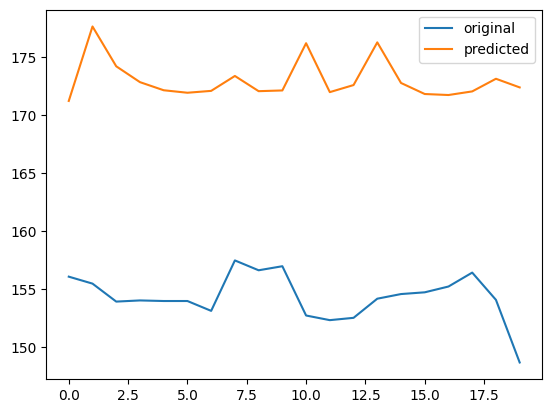

In [ ]:
## Federal bank
plt.plot(fb_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [ ]:
## Kotak Bank
## Random weight generation

ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<10000:
  m1=np.random.rand()*0.05
  m2=np.random.rand()*0.05
  m3=np.random.rand()
  m4=np.random.rand()
  m5=np.random.rand()*0.05
  m6=np.random.rand()*0.05
  sum=np.sum([m1,m2,m3,m4,m5,m6])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6)==m3 and m1+m2+m3+m4+m5+m6==1:
    for i in range(len(kotak_actual_pred)):
      v=m1*axis_actual_pred[i]+m2*fb_actual_pred[i]+m3*kotak_actual_pred[i]+m4*au_actual_pred[i]+m5*hdfc_actual_pred[i]+m6*sbi_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    mse=np.mean((kotak_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
    ct=ct+1
  else:
    ct=ct+1


print(best_weights)




[0.028276571784557464, 0.0012989579573145873, 0.9437077737554536, 0.0066007965738675576, 0.018619271457819865, 0.0014966284709869878]


In [ ]:
pred=[]
for i in range(len(kotak_actual_pred)):
  v=best_weights[0]*axis_actual_pred[i]+best_weights[1]*fb_actual_pred[i]+best_weights[2]*kotak_actual_pred[i]+best_weights[3]*au_actual_pred[i]+best_weights[4]*hdfc_actual_pred[i]+best_weights[5]*sbi_actual_pred[i]
  pred.append(v)

print(kotak_actual_pred)
print(pred)

[1750.8726570175081, 1817.3, 1761.6, 1758.6499999999999, 1756.8, 1761.8999999999999, 1757.4, 1770.25, 1752.2, 1778.3, 1754.15, 1754.1, 1751.55, 1773.6499999999999, 1779.35, 1758.8999999999999, 1775.85, 1767.05, 1768.1000000000001, 1762.6000000000001]
[1720.8005391284594, 1785.328442823846, 1731.4419924607469, 1728.6474000427074, 1726.5609675408277, 1732.1068193460933, 1727.5226958261724, 1739.9122417266176, 1722.6988763669672, 1747.2334701627206, 1724.0835078759555, 1724.1750621184328, 1721.7861737610356, 1742.7234528707102, 1748.7899580414037, 1728.9629535460326, 1744.84840775026, 1736.9000917267258, 1737.1790244003494, 1732.161635053001]


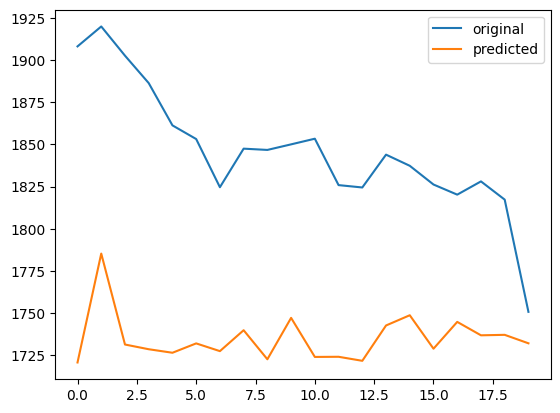

In [ ]:
## kotak bank
plt.plot(kotak_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [ ]:
## AU Bank

## Kotak Bank
## Random weight generation

ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<10000:
  m1=np.random.rand()
  m2=np.random.rand()
  m3=np.random.rand()
  m4=np.random.rand()
  m5=np.random.rand()
  m6=np.random.rand()
  sum=np.sum([m1,m2,m3,m4,m5,m6])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6)==m4 and m1+m2+m3+m4+m5+m6==1:
    for i in range(len(au_actual_pred)):
      v=m1*axis_actual_pred[i]+m2*fb_actual_pred[i]+m3*kotak_actual_pred[i]+m4*au_actual_pred[i]+m5*hdfc_actual_pred[i]+m6*sbi_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    mse=np.mean((au_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
    ct=ct+1
  else:
    ct=ct+1


print(best_weights)




[0.205319515528978, 0.08406436648258776, 0.04850546783163684, 0.3019049488380666, 0.2442228998086025, 0.11598280151012831]


In [ ]:
pred=[]
for i in range(len(au_actual_pred)):
  v=best_weights[0]*axis_actual_pred[i]+best_weights[1]*fb_actual_pred[i]+best_weights[2]*kotak_actual_pred[i]+best_weights[3]*au_actual_pred[i]+best_weights[4]*hdfc_actual_pred[i]+best_weights[5]*sbi_actual_pred[i]
  pred.append(v)

print(au_actual_pred)
print(pred)

[1104.4842916157077, 1126.2, 1109.6999999999998, 1115.6999999999998, 1106.0, 1116.8999999999999, 1118.05, 1118.05, 1119.85, 1109.0, 1104.05, 1112.45, 1111.25, 1112.8, 1118.6999999999998, 1111.3500000000001, 1110.2, 1116.1, 1105.25, 1108.85]
[1103.7144354224831, 1134.2713239722718, 1112.332998553048, 1110.9756376244188, 1106.2216427983092, 1116.4474297215104, 1111.7036188680493, 1116.0180645176204, 1113.3111812235811, 1112.4231105252056, 1108.5869516436485, 1108.2098319409688, 1108.8973881580055, 1112.571608358683, 1120.795719244554, 1112.4050044548094, 1111.1520339805038, 1116.5724952290107, 1106.105186975029, 1108.8397118447806]


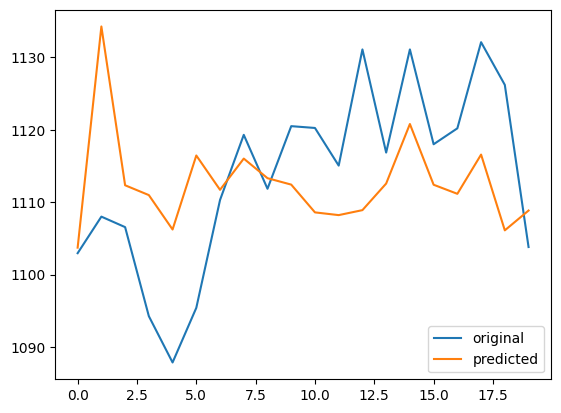

In [ ]:
## au bank
plt.plot(au_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [ ]:
## HDFC



## Random weight generation

ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<10000:
  m1=np.random.rand()
  m2=np.random.rand()
  m3=np.random.rand()*0.3
  m4=np.random.rand()
  m5=np.random.rand()
  m6=np.random.rand()
  sum=np.sum([m1,m2,m3,m4,m5,m6])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6)==m5 and m1+m2+m3+m4+m5+m6==1:
    for i in range(len(hdfc_actual_pred)):
      v=m1*axis_actual_pred[i]+m2*fb_actual_pred[i]+m3*kotak_actual_pred[i]+m4*au_actual_pred[i]+m5*hdfc_actual_pred[i]+m6*sbi_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    mse=np.mean((hdfc_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
    ct=ct+1
  else:
    ct=ct+1


print(best_weights)




[0.03861340030672515, 0.12094986783501363, 0.17213652520973158, 0.03047739311498153, 0.6324810322792325, 0.005341781254315688]


In [ ]:
pred=[]
for i in range(len(hdfc_actual_pred)):
  v=best_weights[0]*axis_actual_pred[i]+best_weights[1]*fb_actual_pred[i]+best_weights[2]*kotak_actual_pred[i]+best_weights[3]*au_actual_pred[i]+best_weights[4]*hdfc_actual_pred[i]+best_weights[5]*sbi_actual_pred[i]
  pred.append(v)

print(hdfc_actual_pred)
print(pred)

[1556.7211377915428, 1609.05, 1569.9, 1559.25, 1558.8999999999999, 1578.0, 1557.85, 1571.75, 1558.4, 1573.8500000000001, 1561.85, 1555.8, 1558.45, 1558.65, 1585.7, 1571.2, 1567.8999999999999, 1575.25, 1557.8500000000001, 1559.95]
[1383.1970521818307, 1430.1361811669328, 1394.2293059903125, 1387.1891857018193, 1385.9129483105357, 1399.5734426501863, 1386.154412159452, 1397.317854130942, 1385.7455339866754, 1399.2643853395384, 1387.754152105629, 1383.8973537516592, 1385.1456995516285, 1389.674668854375, 1407.6862712743139, 1394.3818087557897, 1395.1071449340668, 1398.7033724834675, 1387.2638234464189, 1387.8132946074543]


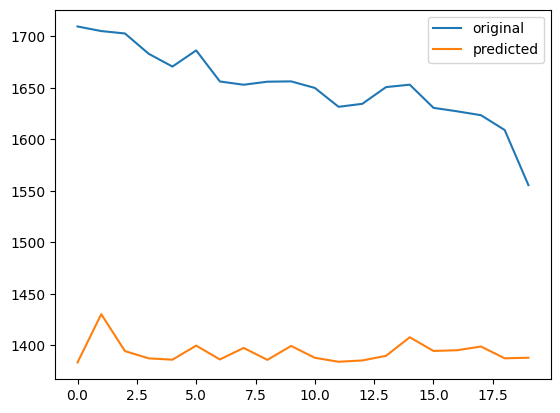

In [ ]:
## hdfc bank
plt.plot(hdfc_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [ ]:
## sbi



## Random weight generation

ct=0
min_error=1.7976931348623157e+308
best_weights=[]

while ct<10000:
  m1=np.random.rand()
  m2=np.random.rand()
  m3=np.random.rand()*0.4
  m4=np.random.rand()*0.4
  m5=np.random.rand()
  m6=np.random.rand()
  sum=np.sum([m1,m2,m3,m4,m5,m6])
  m1=m1/sum
  m2=m2/sum
  m3=m3/sum
  m4=m4/sum
  m5=m5/sum
  m6=m6/sum
  mse=0
  temp=[]
  if max(m1,m2,m3,m4,m5,m6)==m6 and m1+m2+m3+m4+m5+m6==1:
    for i in range(len(sbi_actual_pred)):
      v=m1*axis_actual_pred[i]+m2*fb_actual_pred[i]+m3*kotak_actual_pred[i]+m4*au_actual_pred[i]+m5*hdfc_actual_pred[i]+m6*sbi_actual_pred[i]
      temp.append(v)
    temp=np.array(temp)
    mse=np.mean((sbi_actual_pred-temp)**2)
    if mse<min_error:
      best_weights=[]
      min_error=mse
      best_weights.append(m1)
      best_weights.append(m2)
      best_weights.append(m3)
      best_weights.append(m4)
      best_weights.append(m5)
      best_weights.append(m6)
    ct=ct+1
  else:
    ct=ct+1


print(best_weights)




[0.04388377954876192, 0.2914547281583172, 0.0026757933036023317, 0.011651093345170067, 0.08977288848474958, 0.5605617171593988]


In [ ]:
pred=[]
for i in range(len(sbi_actual_pred)):
  v=best_weights[0]*axis_actual_pred[i]+best_weights[1]*fb_actual_pred[i]+best_weights[2]*kotak_actual_pred[i]+best_weights[3]*au_actual_pred[i]+best_weights[4]*hdfc_actual_pred[i]+best_weights[5]*sbi_actual_pred[i]
  pred.append(v)

print(sbi_actual_pred)
print(pred)

[572.5348845596194, 594.65, 585.6, 572.15, 575.6, 574.0, 572.2, 573.85, 579.35, 575.55, 596.7, 572.3000000000001, 578.6, 591.3000000000001, 579.6, 579.1, 573.1500000000001, 582.25, 574.6, 581.0]
[569.8296162354992, 590.0917852217943, 579.5497890866804, 571.0442954382597, 572.1991560570965, 573.533886985237, 570.8406399073838, 573.4121122447839, 574.9257889741388, 573.7082213559789, 585.2694096863859, 570.3782635151902, 574.2199627314612, 582.5223567506318, 577.7149575167299, 575.4223319673578, 571.7868015473356, 577.8664254092595, 571.8389455812546, 575.5233903243907]


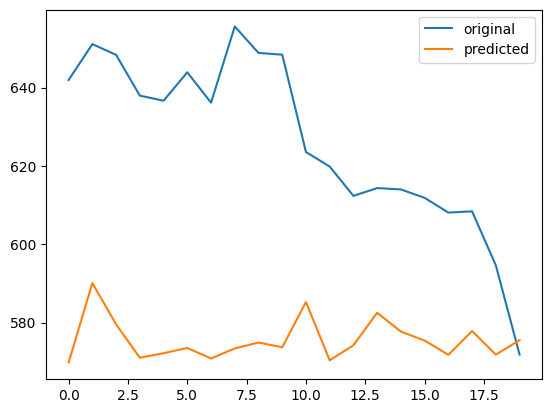

In [ ]:
## sbi bank
pred=pred
plt.plot(sbi_original)
plt.plot(pred)
plt.legend(['original','predicted'])

In [ ]:

# ct=0
# min_error=1.7976931348623157e+308
# best_weights=[]

# while ct<100:
#   m1=np.random.rand()
#   m2=np.random.rand()*0.06
#   m3=np.random.rand()*0.06
#   m4=np.random.rand()*0.06
#   m5=np.random.rand()*0.06
#   m6=np.random.rand()*0.06
#   m7=np.random.rand()*0.06
#   m8=np.random.rand()*0.06
#   m9=np.random.rand()*0.06
#   m10=np.random.rand()*0.06
#   m11=np.random.rand()*0.06
#   sum=np.sum([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11])
#   m1=m1/sum
#   m2=m2/sum
#   m3=m3/sum
#   m4=m4/sum
#   m5=m5/sum
#   m6=m6/sum
#   m7=m7/sum
#   m8=m8/sum
#   m9=m9/sum
#   m10=m10/sum
#   m11=m11/sum
#   mse=0
#   temp=[]
#   if max(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11)==m1 and m1+m2+m3+m4+m5+m6+m7+m8+m9+m10+m11<=1:

#     for i in range(len(tvs_actual_pred)):
#       v=m1*tvs_actual_pred[i]+m2*ashok_actual_pred[i]+m3*apollo_actual_pred[i]+m4*bajaj_actual_pred[i]+m5*balkrishna_actual_pred[i]+m6*bosch_actual_pred[i]+m7*eicher_actual_pred[i]+m8*hero_actual_pred[i]+m9*mahindra_actual_pred[i]+m10*motherson_actual_pred[i]+m11*tube_actual_pred[i]
#       temp.append(v)
#     temp=np.array(temp)
#     # print(temp)
#     mse=np.mean((tvs_actual_pred-temp)**2)
#     if mse<min_error:
#       best_weights=[]
#       min_error=mse
#       best_weights.append(m1)
#       best_weights.append(m2)
#       best_weights.append(m3)
#       best_weights.append(m4)
#       best_weights.append(m5)
#       best_weights.append(m6)
#       best_weights.append(m7)
#       best_weights.append(m8)
#       best_weights.append(m9)
#       best_weights.append(m10)
#       best_weights.append(m11)
#     ct=ct+1
#   else:
#     ct=ct+1
# print(best_weights)

# pred=[]
# for i in range(len(tvs_actual_pred)):
#   v=best_weights[0]*tvs_actual_pred[i]+best_weights[1]*ashok_actual_pred[i]+best_weights[2]*apollo_actual_pred[i]+best_weights[3]*bajaj_actual_pred[i]+best_weights[4]*balkrishna_actual_pred[i]+best_weights[5]*bosch_actual_pred[i]+best_weights[6]*eicher_actual_pred[i]+best_weights[7]*hero_actual_pred[i]+best_weights[8]*mahindra_actual_pred[i]+best_weights[9]*motherson_actual_pred[i]+best_weights[10]*tube_actual_pred[i]
#   pred.append(v)